In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-010811570.05_2multiple_result.pkl')


#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-01081157EP5000.05_multiple_result.pkl') bad

#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-01081157EP3000.01_multiple_result.pkl') bad
#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-01081157EP5000.01_multiple_result.pkl')
#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-01081157EP1000.01_multiple_result.pkl')
#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-01081157EP5000.05_multiple_result.pkl')
#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-010811570.1_2multiple_result.pkl') #okay
#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-010811570.2_2multiple_result.pkl')
#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-010811570.2_multiple_result.pkl')
#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-010811570.05_2multiple_result.pkl')
#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-010811570.12_2multiple_result.pkl') #okay
#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-010811571_2multiple_result.pkl')


#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-01081157EP1000.1_win_multiple_result.pkl')
                        
#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-01081157EP5000.1_multiple_result.pkl')

#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-01081157EP2000.1_single_result.pkl')


#result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-01081157EP2000.1_single2_result.pkl')

result_log_set = torch.load('../firefly-inverse-data/data/20191231-172726-01081157EP5000.1_no_parl_part_theta_result.pkl')

result = {'true_theta': true_theta,
              'initial_theta': ini_theta,
              'theta': theta,
              'theta_log': theta_log,
              'loss_log': loss_log,
              'filename': filename,
              'num_batches': num_batches,
              'duration': toc-tic,
              'arguments': arg,
              'stderr': stderr
              }

In [2]:
result_log_set

[{'true_theta': tensor([11.4042,  8.6168,  0.0848,  1.7711,  8.5598,  9.7977,  0.1619,  0.5467,
           0.4338]),
  'initial_theta': tensor([ 8.9993, 11.3383,  0.0848,  1.7711, 11.4681,  9.4139,  0.1619,  0.5467,
           0.4863]),
  'theta': Parameter containing:
  tensor([11.5057,  8.5221,  0.0848,  1.7711,  8.6873,  9.0267,  0.1619,  0.5467,
           0.4258], requires_grad=True),
  'theta_log': deque([tensor([ 9.0043, 11.3333,  0.0848,  1.7711, 11.4631,  9.4089,  0.1619,  0.5467,
                  0.4913]),
         tensor([ 9.0092, 11.3290,  0.0848,  1.7711, 11.4581,  9.4041,  0.1619,  0.5467,
                  0.4962]),
         tensor([ 9.0142, 11.3246,  0.0848,  1.7711, 11.4538,  9.3998,  0.1619,  0.5467,
                  0.5000]),
         tensor([ 9.0191, 11.3201,  0.0848,  1.7711, 11.4492,  9.3952,  0.1619,  0.5467,
                  0.5000]),
         tensor([ 9.0241, 11.3155,  0.0848,  1.7711, 11.4445,  9.3906,  0.1619,  0.5467,
                  0.5000]),
         

In [3]:
len(result_log_set)

1

In [4]:
result_log= result_log_set[0]

In [5]:
result_log

{'true_theta': tensor([11.4042,  8.6168,  0.0848,  1.7711,  8.5598,  9.7977,  0.1619,  0.5467,
          0.4338]),
 'initial_theta': tensor([ 8.9993, 11.3383,  0.0848,  1.7711, 11.4681,  9.4139,  0.1619,  0.5467,
          0.4863]),
 'theta': Parameter containing:
 tensor([11.5057,  8.5221,  0.0848,  1.7711,  8.6873,  9.0267,  0.1619,  0.5467,
          0.4258], requires_grad=True),
 'theta_log': deque([tensor([ 9.0043, 11.3333,  0.0848,  1.7711, 11.4631,  9.4089,  0.1619,  0.5467,
                 0.4913]),
        tensor([ 9.0092, 11.3290,  0.0848,  1.7711, 11.4581,  9.4041,  0.1619,  0.5467,
                 0.4962]),
        tensor([ 9.0142, 11.3246,  0.0848,  1.7711, 11.4538,  9.3998,  0.1619,  0.5467,
                 0.5000]),
        tensor([ 9.0191, 11.3201,  0.0848,  1.7711, 11.4492,  9.3952,  0.1619,  0.5467,
                 0.5000]),
        tensor([ 9.0241, 11.3155,  0.0848,  1.7711, 11.4445,  9.3906,  0.1619,  0.5467,
                 0.5000]),
        tensor([ 9.0291, 1

In [6]:
result_log['true_theta']


tensor([11.4042,  8.6168,  0.0848,  1.7711,  8.5598,  9.7977,  0.1619,  0.5467,
         0.4338])

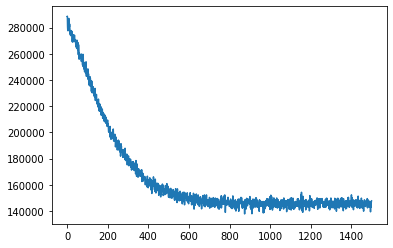

In [7]:
plt.figure()
plt.plot(result_log['loss_log'])

In [8]:
final_theta = result_log['theta'].data
stderr = result_log['stderr']
true_theta = result_log['true_theta']
print(true_theta)

tensor([11.4042,  8.6168,  0.0848,  1.7711,  8.5598,  9.7977,  0.1619,  0.5467,
         0.4338])


In [9]:
final_theta

tensor([11.5057,  8.5221,  0.0848,  1.7711,  8.6873,  9.0267,  0.1619,  0.5467,
         0.4258])

In [10]:
stderr

tensor([0.0013,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan])

Text(0.5, 1.0, 'process forward')

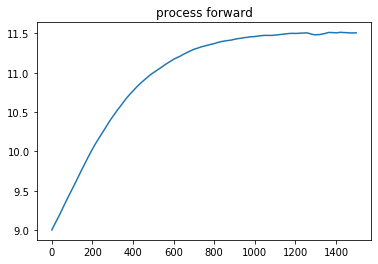

In [11]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][0])
plt.figure()
plt.plot(theta_log)
plt.title('process forward')


Text(0.5, 1.0, 'process angle')

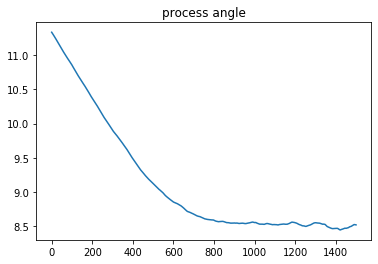

In [12]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][1])
plt.figure()
plt.plot(theta_log)
plt.title('process angle')

Text(0.5, 1.0, 'observation forward')

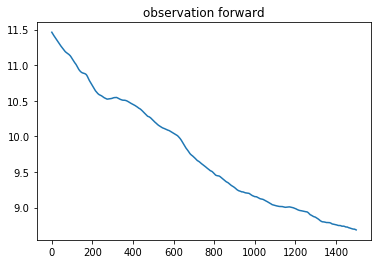

In [13]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][4])
plt.figure()
plt.plot(theta_log)
plt.title('observation forward')

Text(0.5, 1.0, 'observation angle')

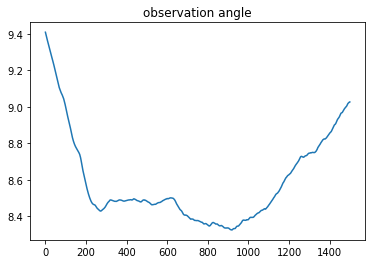

In [14]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][5])
plt.figure()
plt.plot(theta_log)
plt.title('observation angle')

Text(0.5, 1.0, 'goal radius')

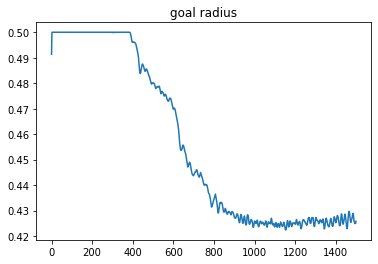

In [15]:
theta_log=[]
for i in range(len(result_log['theta_log'])):
    theta_log.append(result_log['theta_log'][i][8])
plt.figure()
plt.plot(theta_log)
plt.title('goal radius')

In [16]:
final_theta = []
true_theta = []
stderr = []
for ttt in range(len(result_log_set)):
    final_theta.append(result_log_set[ttt]['theta'].data)
    true_theta.append(result_log_set[ttt]['true_theta'].data)
    stderr.append(result_log_set[ttt]['stderr'].data)

In [17]:
final_theta[:][:][0]

tensor([11.5057,  8.5221,  0.0848,  1.7711,  8.6873,  9.0267,  0.1619,  0.5467,
         0.4258])

In [18]:
final_theta = torch.zeros(len(result_log_set), 9)
true_theta= torch.zeros(len(result_log_set), 9)
stderr= torch.zeros(len(result_log_set), 9)


In [19]:
for ttt in range(len(result_log_set)):
    final_theta[ttt,:]= result_log_set[ttt]['theta'].data
    true_theta[ttt,:]= result_log_set[ttt]['true_theta'].data
    stderr[ttt,:] = result_log_set[ttt]['stderr'].data    

In [20]:
title_range = ['forward process gain', 'angular process gain', 'process noise std forward',
                          'process noise std angular', 'obs gain forward', 'obs gain angular', 'obs noise std forward',
                          'obs noise std angular', 'goal radius']
for i in range(9):
    mplotter(true_theta[:, i],final_theta[:,i], yerr =stderr[:,i] ,title = title_range[i]+' with (+/-)1std error bar')
    plt.xlim(true_theta[:,i].min()-0.25, true_theta[:,i].max()+0.25)
    plt.ylim(true_theta[:,i].min()-0.25, true_theta[:,i].max()+0.25)

NameError: name 'mplotter' is not defined

In [ ]:
def mplotter(x, y, yerr, title = None, xlabel=None, ylabel=None):
    plt.figure()
    plt.errorbar(x, y, yerr , fmt='o')
    plt.plot(x, x, 'k-')
    
    if xlabel is not None:
        plt.xlabel(xlabel)
    else: plt.xlabel('true')
            
    if ylabel is not None:
        plt.ylabel(ylabel)
    else: plt.ylabel('estimated')
        
    if title is not None:
        plt.title(title)
    